## **MÉTODOS DE ENSAMBLE**

En esta clase abordaremos modelos con un grado de complejidad mayor a los que veníamos trabajando. Hasta ahora, entrenamos y evaluamos cada modelo individualmente. Pero podríamos combinarlos, para así obtener un modelo aún mejor. Eso hace el método de ensamble.

La idea es entrenar muchos modelos y hacerlos votar. La clasificación resultante es la que reciba más votos. Y si los modelos devuelven *scores*, se puede hacer una votación ponderada.

Sin embargo, si todos los modelos son muy parecidos no van a agregar mucha información nueva. Necesitamos modelos diferentes entre sí.

La práctica más habitual es aplicar este método sobre árboles de decisión, ya que es un modelo sencillo, rápido de entrenar y eficiente.

Disponemos de cuatro técnicas para generar modelos de ensamble:

+ Bagging

+ Boosting

+ Stacking

+ Voting

En esta primera práctica hablaremos de **bagging**.

- - -

### **`BAGGING`**

También denominada *bootstrap aggregation*.

Consiste en tomar grupos de muestras al azar de nuestro set de entrenamiento, **con reemplazo**. Dicho en otros términos, es un muestreo con reemplazo de las instancias.

Dado un conjunto de datos, se extraen varias muestras. Por cada muestra obtenida, entrenamos un modelo. Vamos a tener tantos modelos como muestras hayamos sacado, pero todos entrenados sobre una porción distinta del dataset. En general, tendrán mucha varianza (overfitting).

La predicción de salida final se combina en las proyecciones de todos los submodelos (proceso conocido como votación).

Lo que buscamos es un conjunto de árboles con mucha varianza pero poco sesgo, para que al combinarlos -al momento de votar- obtengamos un modelo de baja varianza y bajo sesgo.

Veamos cómo se aplica el boosting, en árboles de decisión, para crear bosques.

- - -

### ***RANDOM FOREST***

<img src = "https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG" height = 350>

Consiste en correr varios árboles de manera paralela y que cada uno vaya votando qué variable de salida le corresponde a cada instancia.

Cuando creamos bosques, puede ocurrir que tengamos pocos predictores fuertes. Si pocos atributos -features- son atributos fuertes, todos los árboles se van a parecer entre sí. Estos atributos terminarán cerca de la raíz para todos los conjuntos generados con bootstrap.
Por más de que los árboles verán distintos subconjuntos de las instancias, se parecerán.

La solución es parecida a la técnica de bootstrap, pero en lugar de hacerlo únicamente en las instancias, también lo hacemos sobre los atributos. Ahora cada árbol verá distintas instancias y distintos features.

Uno de los hiperparámetros a definir es la cantidad de atributos a considerar en cada nodo. 

Este modelo provee buenos estimadores de error (obb_score) e importancia de las variables.

- - -

### `Práctica`

Vamos a trabajar con el siguiente [dataset](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package).

### ***Análisis exploratorio y preprocesamiento de datos***

In [1]:
### Importamos todas las librerías necesarias

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

In [2]:
# Cargamos el dataset

data = pd.read_csv("..\Datasets\Clase_08_weatherAUS.csv")

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Valores NO nulos
data.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

In [5]:
# Descartamos columnas que aportan poca información
columnas_descartables = ['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date']
data = data.drop(columns=columnas_descartables)
data.shape

(145460, 17)

In [6]:
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
# Dropeamos valores faltantes
data = data.dropna()
print(data.shape)
data.head()

(112925, 17)


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [8]:
# Descartamos columnas categóricas para simplificar el preprocesamiento

columnas_descartables = ['WindGustDir','WindDir9am','WindDir3pm','RainToday']
data = data.drop(columns=columnas_descartables)
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No


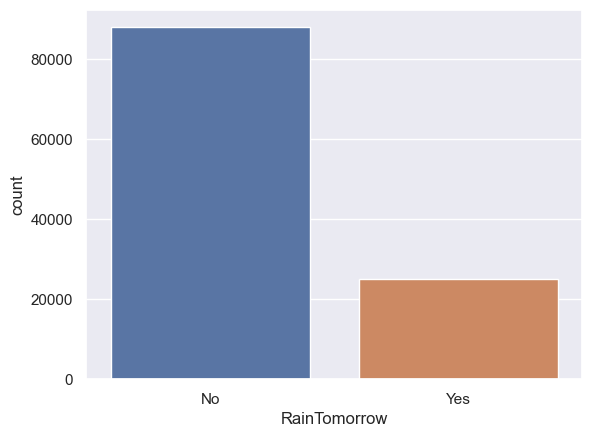

In [9]:
# Observamos cuántos casos hay de lluvia y cuántos no

sns.countplot(x = 'RainTomorrow', data = data)
plt.show()

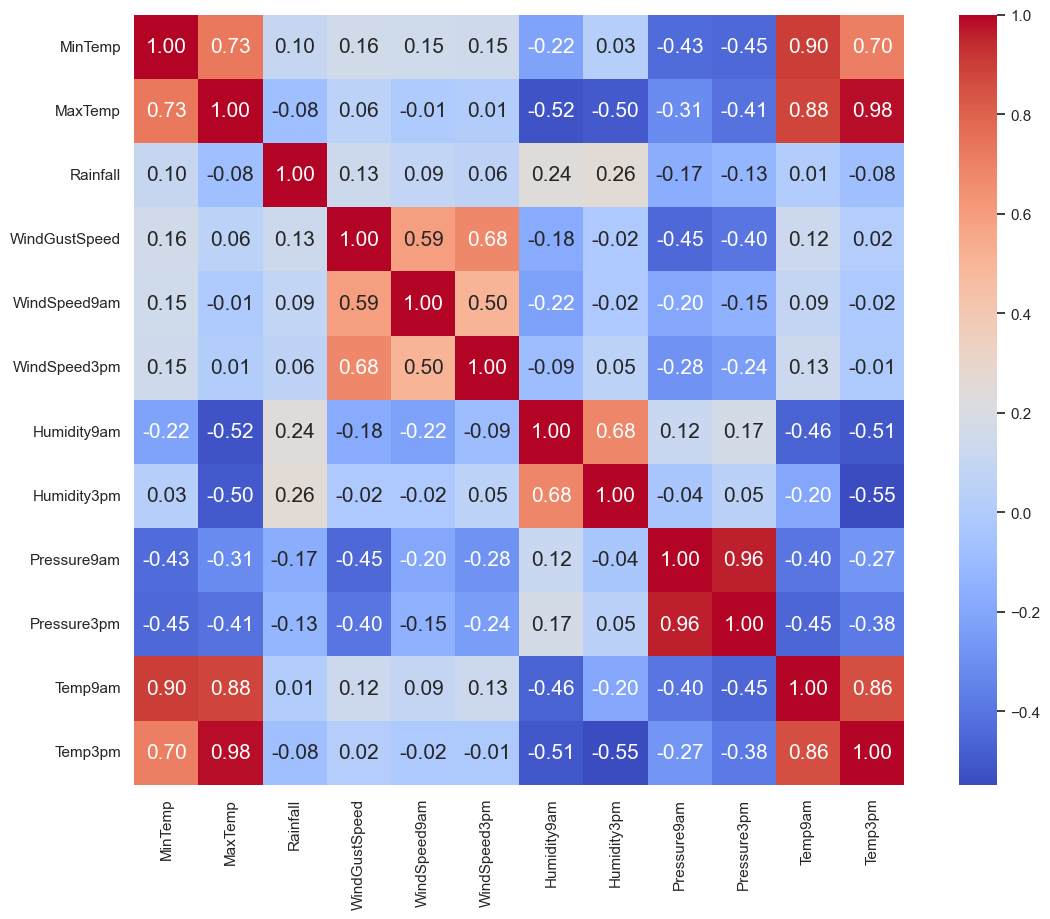

In [10]:
# Hacemos un mapa de calor

corr = data.drop(columns = ['RainTomorrow']).corr(method='pearson')
plt.figure(figsize=(14,10)) 
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.drop(columns = ['RainTomorrow']).columns, 
           yticklabels= data.drop(columns = ['RainTomorrow']).columns,
           cmap= 'coolwarm')

plt.show()

In [11]:
# En base a la información obtenida, podríamos descartar algunas columnas redundantes

data = data.drop(columns=['Temp3pm', 'Pressure9am'])

In [12]:
# Convertimos la variable de salida en numérica

data['RainTomorrow'] = data['RainTomorrow'].map({'Yes':1,'No':0})
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.1,16.9,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1007.8,17.2,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1008.7,21.0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1012.8,18.1,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1006.0,17.8,0


### ***Datos de entrenamiento y casos benchmark***

Generaremos un modelo benchmark contra el cual comparar nuestros resultados.

In [13]:
# Elegimos variables de entrenamiento (empezamos con dos) y separamos las etiquetas

columnas_entrenamiento = ['MaxTemp', 'Humidity3pm']
X = data[columnas_entrenamiento]
# X = data.drop(columns = 'RainTomorrow')
y = data.RainTomorrow

In [14]:
# Generamos un modelo que diga siempre que NO va a llover y medimos su exactitud

y_pred = np.zeros(y.shape) # Generamos un vector de ceros del mismo tamaño que y (cantidad de muestras) 
accuracy_ceros = metrics.accuracy_score(y,y_pred) # Comparamos y con y_pred y calculamos la exactitud del modelo 
print(accuracy_ceros)

0.7784458711534205


In [15]:
# Generamos otro modelo que diga siempre que SÍ va a llover y medimos su exactitud

y_pred = np.ones(y.shape) # Generamos un vector de unos del mismo tamaño que y (cantidad de muestras) 
accuracy_unos = metrics.accuracy_score(y,y_pred) # Comparamos y con y_pred y calculamos la exactitud del modelo 
print(accuracy_unos)

0.2215541288465796


In [16]:
# Separamos nuestros datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

**Vamos a entrenar distintos árboles y mostrarles distintas porciones del dataset**

In [17]:
lista_de_modelos = []
N_modelos = 10

In [18]:
for i in range(N_modelos):
    X_train_boostrap, _, y_train_boostrap, _ = train_test_split(X_train, y_train, test_size=0.5, stratify = y_train)
    clf = DecisionTreeClassifier(max_depth = None) # Lo dejamos sobreajustar
    clf.fit(X_train_boostrap, y_train_boostrap)
    lista_de_modelos.append(clf)

In [19]:
# Evaluamos cada modelo en hold-out (test) y calculamos la exactitud
# que es hold-out?: Es el conjunto de datos que separamos para testear el modelo y ver que tan bien generaliza a datos que no ha visto antes (datos nuevos)

for idx, modelo in enumerate(lista_de_modelos):
    y_test_pred = modelo.predict(X_test)
    print('Accuracy Modelo ', idx, ' es ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Modelo  0  es  0.7905425349784521
Accuracy Modelo  1  es  0.7920774543951827
Accuracy Modelo  2  es  0.788505814983175
Accuracy Modelo  3  es  0.788387744258811
Accuracy Modelo  4  es  0.7910443355569986
Accuracy Modelo  5  es  0.7931400909144578
Accuracy Modelo  6  es  0.7905130172973611
Accuracy Modelo  7  es  0.790690123383907
Accuracy Modelo  8  es  0.7913395123679083
Accuracy Modelo  9  es  0.7913395123679083


**Evaluemos, ahora, el accuracy de todo el ensamble usando el conjunto de hold-out. Lo haremos con el promedio de las probabilidades que devuelve cada árbol. Si la probabilidad promedio es mayor a 0.5, clasificamos como positivo**.

In [20]:
probs_test_pred = np.zeros(y_test.size)

In [21]:
# Recorremos la lista y predecimos las probabilidades

for modelo in lista_de_modelos:
    probs_test_pred_modelo = modelo.predict_proba(X_test) # Predecimos las probabilidades de cada clase (0 y 1)
    #print(probs_test_pred_modelo.shape)
    probs_test_pred +=probs_test_pred_modelo[:,1] # Sumamos las probabilidades de que llueva de cada modelo (columna 1)

In [22]:
probs_test_pred = probs_test_pred/N_modelos # Dividimos por la cantidad de modelos para obtener el promedio de las probabilidades de que llueva de cada modelo (columna 1)

In [23]:
y_test_pred = probs_test_pred>0.5 # Si la probabilidad de que llueva es mayor a 0.5, predecimos que llueve (True), sino no (False)  
y_test_pred = y_test_pred.astype(int) # Convertimos los True y False en 1 y 0 respectivamente   

In [24]:
print('Accuracy del ensamble: ', metrics.accuracy_score(y_test, y_test_pred)) # Comparamos y_test con y_test_pred y calculamos la exactitud del modelo 

Accuracy del ensamble:  0.8022020190093866


### `Usemos Bagging Classifier`

Podrán acceder a la documentación haciendo click [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).

In [25]:
from sklearn.ensemble import BaggingClassifier

In [26]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap_features=False, n_estimators= 100, n_jobs = -1)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train) 
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8631700127772085
0.8037959737882991


c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


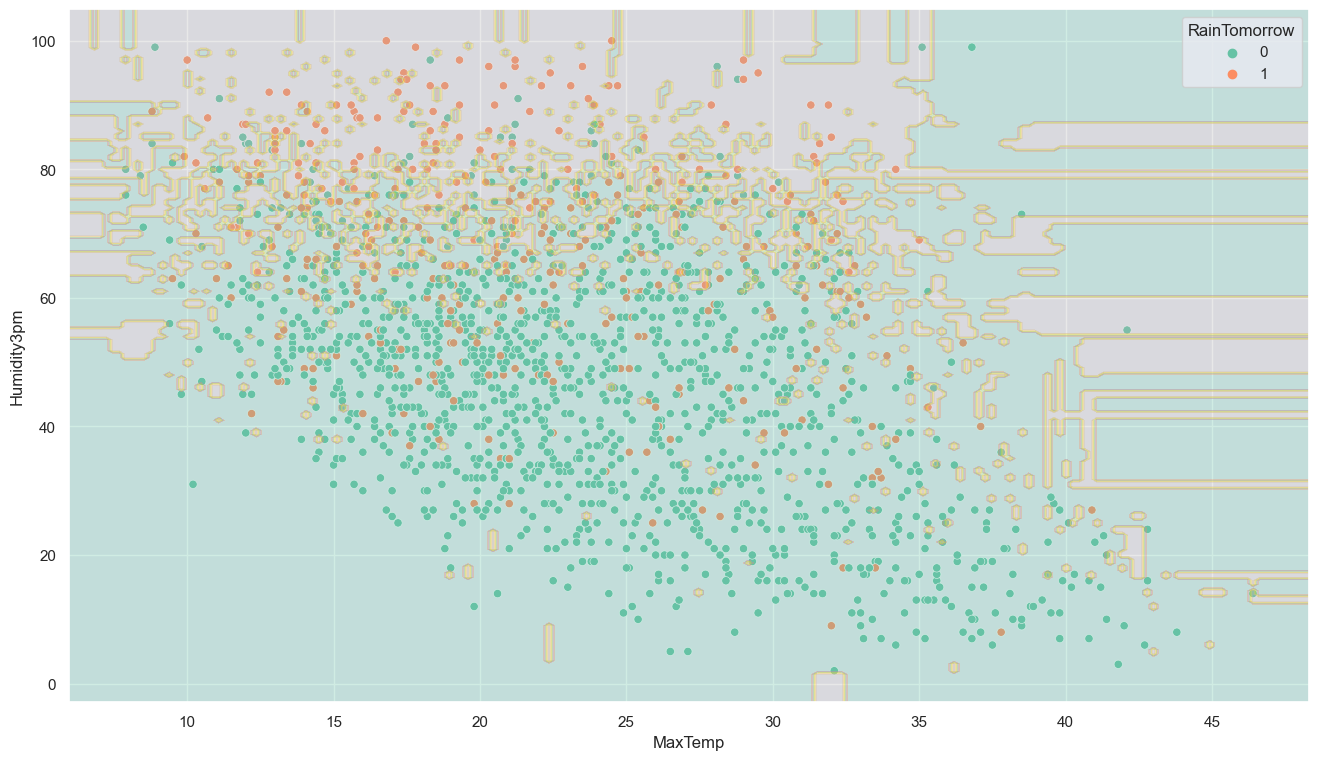

In [27]:
N = 20 # Con esto evitamos plotear todos los puntos y saturar el gráfico

plt.figure(figsize = (16,9))

ax = sns.scatterplot(x = X_test[::N].MaxTemp, y = X_test[::N].Humidity3pm, hue=y_test[::N], palette='Set2')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')

plt.show()

### ***Random Forest***

Random Forest aplica bagging y, además, selecciona features al azar.

Podrán acceder a la documentación haciendo click [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random+forest).



In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Instanciamos el modelo

clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [30]:
# Evaluamos

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.8631447113742458
0.8035303146584805


In [31]:
clf.oob_score_

0.8037243665161233

In [32]:
clf.feature_importances_

array([0.42866631, 0.57133369])

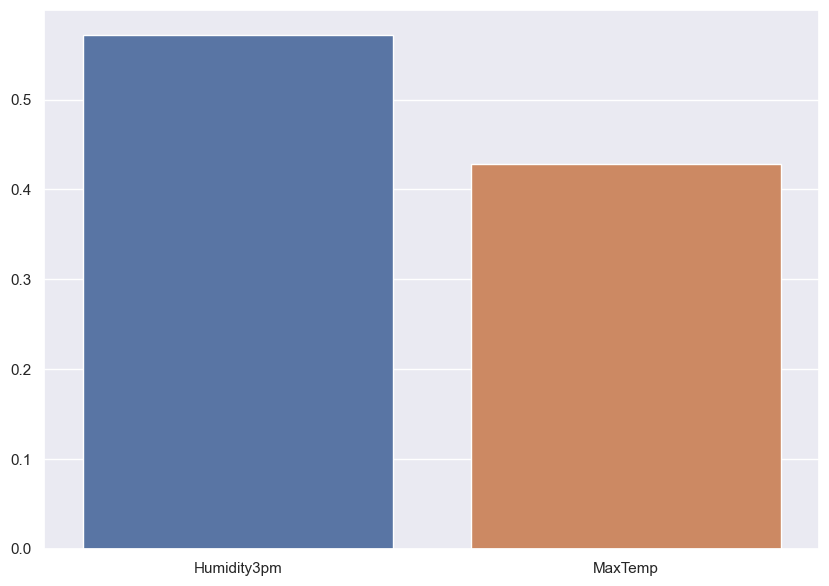

In [33]:
# Diagrama de barras de la importancia de los atributos

importances = clf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (10,7))
sns.barplot(x = columns[indices], y = importances[indices])
plt.show()


In [34]:
clf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1914837113),
 DecisionTreeClassifier(max_features='sqrt', random_state=669991378),
 DecisionTreeClassifier(max_features='sqrt', random_state=429389014),
 DecisionTreeClassifier(max_features='sqrt', random_state=249467210),
 DecisionTreeClassifier(max_features='sqrt', random_state=1972458954),
 DecisionTreeC

In [35]:
# Elegimos, aleatoriamente, uno de los árboles del bosque

clf_tree = clf.estimators_[50]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1224821422,
 'splitter': 'best'}

In [36]:
# Predecimos y evaluamos en train y test

y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.8411324907966147
0.7881811204911742


c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [37]:
train_accuracy = []
test_accuracy = []
oob_scores = []

N_estimadores = [1,2,3,4,5,10,25,50,100,250,500,1000]
for estimadores in N_estimadores:
    print(estimadores)
    clf = RandomForestClassifier(n_estimators=estimadores, n_jobs=-1, oob_score= True, random_state = 42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
    oob_scores.append(clf.oob_score_) # Exactitud en el conjunto de entrenamiento (out-of-bag)
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)
oob_scores = np.array(oob_scores)

c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


1
2


c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


3
4


c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


5
10


c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


25


c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


50
100
250
500
1000


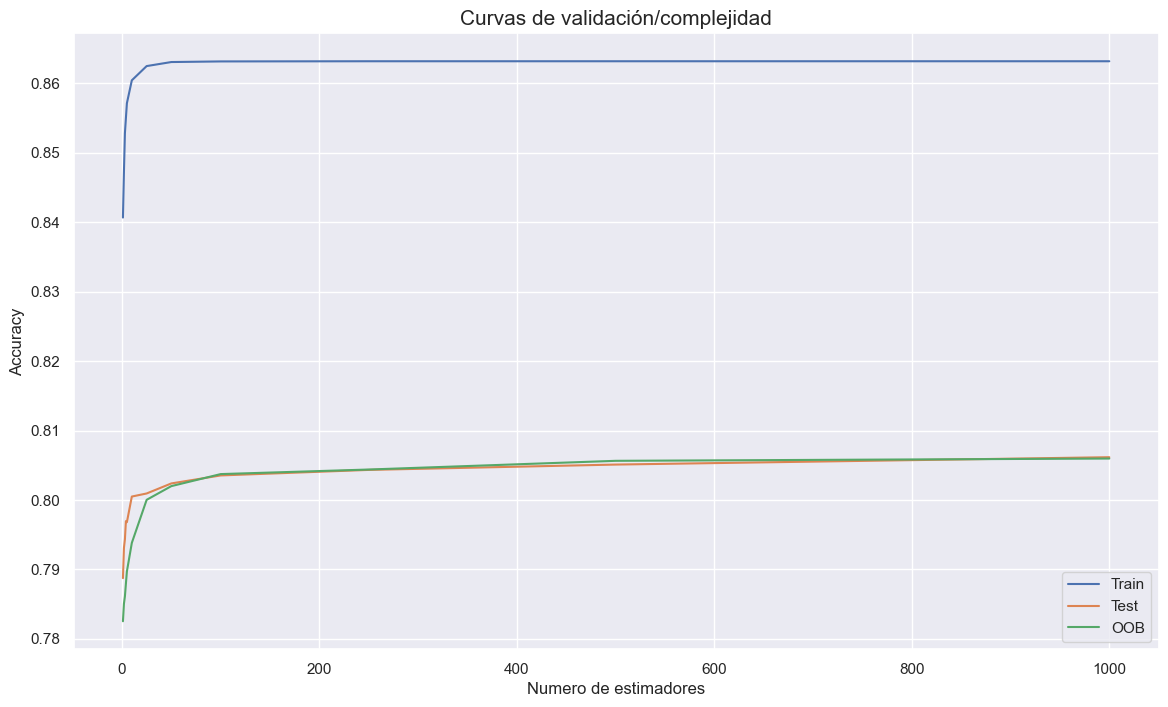

In [38]:
plt.figure(figsize = (14,8))
plt.plot(N_estimadores, train_accuracy, label = 'Train')
plt.plot(N_estimadores, test_accuracy, label = 'Test')
plt.plot(N_estimadores, oob_scores, label = 'OOB') # Out of Bag score 
plt.xlabel('Numero de estimadores')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de validación/complejidad', fontsize = 15)
# plt.xlim(0,50)
plt.show()

### Probemos un modelo Random Forest con 250 árboles

In [39]:
# Tengan paciencia que esto lleva su tiempo :)
import time

comienzo = time.time()
clf = RandomForestClassifier(n_estimators=250, n_jobs=-1, oob_score= True, random_state = 42)

train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, y_train, 
                                                         train_sizes = np.linspace(0.0001,1,10),
                                                         scoring = 'accuracy', cv=5)
fin = time.time() - comienzo

print(f'Tardó {round(fin)} segundos')

Tardó 117 segundos


A continuación, utilizaremos la llamada curva de aprendizaje. Esta es una herramienta que nos muestra el _trade-off_ entre varianza y sesgo de nuestro modelo. Mientras el score del random forest este más cerca de uno, el modelo ajusta mejor la función que esta representando. Muestra el score de la cross-validation y el del entrenamiento de un estimador variando la cantidad de muestras de set de entrenamiento.

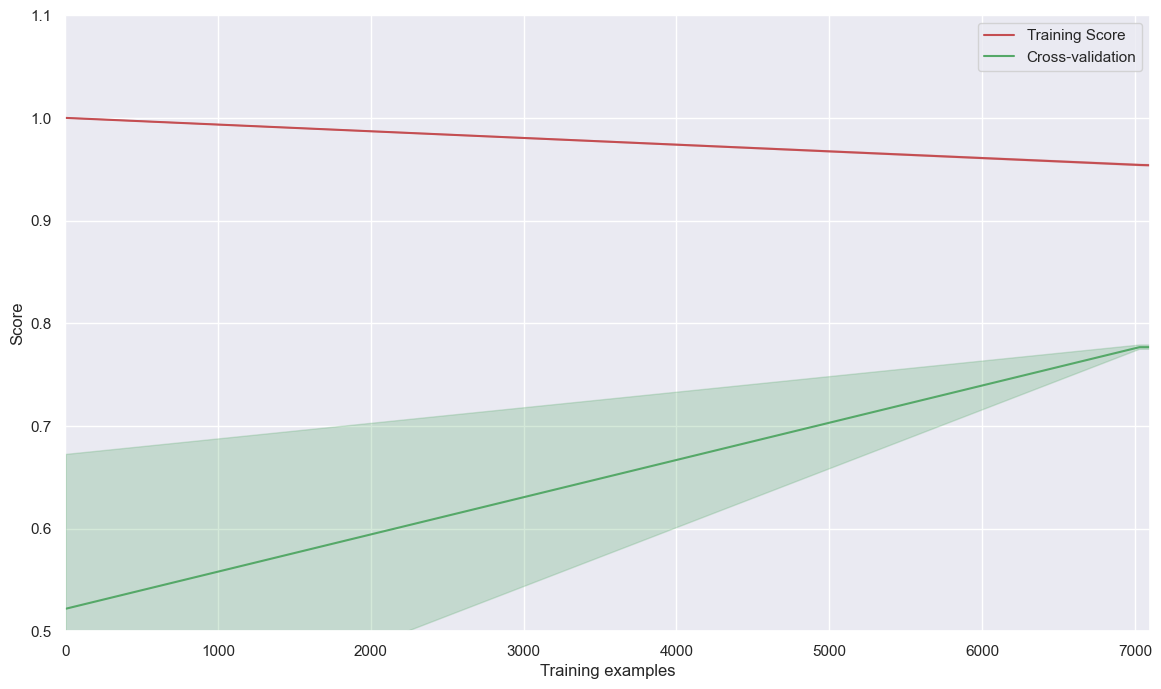

In [40]:
# Graficamos la curva de aprendizaje

plt.figure(figsize = (14,8))
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'r')
plt.plot(train_sizes, valid_scores.mean(axis = 1), color = 'g')

plt.fill_between(train_sizes, train_scores.mean(axis = 1)- train_scores.std(axis = 1),
                     train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes, valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
                     valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")

plt.ylim(0.5,1.1)
plt.xlim(0,7100)
plt.legend(['Training Score','Cross-validation'])
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.show()

- - -